
I'm trying to get murders per 100,000 inhabitants per US state per race. I need this because I need two populations to compare. I have UNODC murder rates for the US as a whole, African–Americans as percentage of total population (1790–2010) by U.S. state, White American population as of 2000 and 2010 censuses, and a year common to each of these tables. How do I get the rate per race per state from that?

If you are curious about the choice of subject matter, I'm trying to disprove things with simple statistics - generally, Nazi pseudoscience about genetics and race and Marxist pseudoscience about the malleability of human nature. In this case, it's the idea that homicide rate correlates with the continent your ancestors evolved on. It's mostly a disappointing exercise trying to simplify something that is complex, but I'm merely trying to show that simple, ideologically-motivated ideas don't hold up. And these exercises that I am giving myself are good practice.

In [3]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

# https://www.kaggle.com/jyzaguirre/us-homicide-reports/version/2
homicides_df = load_csv('U.S._Homicide_Reports,_1980-2014_Homicides_between_1980_and_2014')

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_FOLDER	 ENCODING_TYPE	 SAVES_FOLDER	 attempt_to_pickle	 column_list	 example_iterrows	 get_column_descriptions	 load_csv	 load_dataframes	 
load_object	 math	 os	 pd	 pickle	 save_dataframes	 store_objects	 


C:\Users\dev\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3183: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:

homicides_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [5]:

len(homicides_df['State'].unique())

51

In [6]:

homicides_df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014], dtype=int64)

In [9]:

match_series = (homicides_df['Year'] == 1980) & (homicides_df['State'] == 'Alabama')
homicides_df[match_series]['City'].unique()

array(['Jefferson', 'Mobile', 'Montgomery', 'Autauga', 'Baldwin',
       'Barbour', 'Blount', 'Bullock', 'Butler', 'Calhoun', 'Chambers',
       'Chilton', 'Choctaw', 'Clarke', 'Cleburne', 'Coffee', 'Colbert',
       'Conecuh', 'Coosa', 'Covington', 'Crenshaw', 'Cullman', 'Dale',
       'Dallas', 'De Kalb', 'Elmore', 'Escambia', 'Etowah', 'Fayette',
       'Franklin', 'Geneva', 'Greene', 'Houston', 'Jackson', 'Lamar',
       'Lauderdale', 'Lawrence', 'Lee', 'Limestone', 'Lowndes', 'Macon',
       'Madison', 'Marengo', 'Marion', 'Marshall', 'Morgan', 'Perry',
       'Pickens', 'Pike', 'Russell', 'St. Clair', 'Shelby', 'Sumter',
       'Talladega', 'Tallapoosa', 'Tuscaloosa', 'Walker', 'Washington',
       'Wilcox', 'Winston'], dtype=object)

In [11]:

homicides_df.sample(5).T

,169863,190769,402466,432071,205722
Record ID,169864,190770,402467,432072,205723
Agency Code,NC00400,NV00201,AKASP00,UT02903,ILCPD00
Agency Name,Anson,Las Vegas Metro,Alaska State Police,South Ogden,Chicago
Agency Type,Sheriff,County Police,State Police,Municipal Police,Municipal Police
City,Anson,Clark,Juneau,Weber,Cook
State,North Carolina,Nevada,Alaska,Utah,Illinois
Year,1988,1989,2000,2001,1990
Month,September,December,December,January,March
Incident,1,3,2,1,55
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [111]:

homicides_df['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [113]:

column_list = ['State', 'Year', 'Perpetrator Race']
homicides_df[column_list].sample(5).T.tail(15).T

,State,Year,Perpetrator Race
550922,California,2009,Unknown
32281,Louisiana,1981,White
296291,District of Columbia,1994,Unknown
555307,Kentucky,2009,White
432115,Virginia,2001,White


In [115]:

homicides_df['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [116]:

homicides_df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014], dtype=int64)

In [117]:

homicides_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [50]:

wiki_url = 'https://en.wikipedia.org/wiki/'
year_set = set()
for year in homicides_df['Year'].unique():
    try:
        tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
        tables_df_list = pd.read_html(tables_url)
        year_set.add(year)
    except Exception as e:
        print('{}: {}'.format(year, e))
print(year_set)

1981: HTTP Error 404: Not Found
1982: HTTP Error 404: Not Found
1983: HTTP Error 404: Not Found
1984: HTTP Error 404: Not Found
1985: HTTP Error 404: Not Found
1986: HTTP Error 404: Not Found
1987: HTTP Error 404: Not Found
1988: HTTP Error 404: Not Found
1989: HTTP Error 404: Not Found
1991: HTTP Error 404: Not Found
1992: HTTP Error 404: Not Found
1993: HTTP Error 404: Not Found
1994: HTTP Error 404: Not Found
1995: HTTP Error 404: Not Found
1996: HTTP Error 404: Not Found
1997: HTTP Error 404: Not Found
1998: HTTP Error 404: Not Found
1999: HTTP Error 404: Not Found
2001: HTTP Error 404: Not Found
2002: HTTP Error 404: Not Found
2003: HTTP Error 404: Not Found
2004: HTTP Error 404: Not Found
2005: HTTP Error 404: Not Found
2006: HTTP Error 404: Not Found
2007: HTTP Error 404: Not Found
2008: HTTP Error 404: Not Found
2009: HTTP Error 404: Not Found
2011: HTTP Error 404: Not Found
2012: HTTP Error 404: Not Found
2013: HTTP Error 404: Not Found
2014: HTTP Error 404: Not Found
{2000, 2

In [110]:

max_year = max(year_set)

In [118]:

# Get the total victums per race per state for our year
from pandas.core.indexes.frozen import FrozenList

column_list = ['State', 'Perpetrator Race']
match_series = (homicides_df['Year'] == max_year)
homicides_max_year_groupby = homicides_df[match_series].groupby(by=column_list)
homicides_max_year_df = homicides_max_year_groupby['Victim Count'].sum()
homicides_max_year_df.index.names = FrozenList(['State', 'Race'])
homicides_max_year_df.index.names

FrozenList(['State', 'Race'])

In [119]:

homicides_max_year_df = homicides_max_year_df.reset_index()
homicides_max_year_df.sample(5)

In [4]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_U.S._states_by_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [5]:

rate_by_state_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.columns.map(lambda x: int(x))
rate_by_state_df.head(5).T.head(5).T

,2017,2014,2010,2005,2000
State,,,,,
Alabama,8.3,5.7,5.7,8.2,7.4
Alaska,8.4,5.6,4.3,4.8,4.3
Arizona,5.9,4.7,6.4,7.5,7
Arkansas,8.6,5.6,4.6,6.7,6.3
California,4.6,4.4,4.8,6.9,6.1


In [87]:

wiki_url = 'https://en.wikipedia.org/wiki/'
us_pop_df = pd.DataFrame([])
year = 1980
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 2]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [90]:

year = 1990
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [93]:

year = 2000
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [103]:

year = 2010
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [104]:

pop_df.head()

,Rank_2010,Population_2010
State,,
California,1,37253956
Texas,2,25145561
New York,3,19378102
Florida,4,18801310
Illinois,5,12830632


In [107]:

us_pop_df = us_pop_df.dropna()
us_pop_df.sample(5).T

State,North Carolina,Florida,Missouri,Alaska,Kansas
Rank_1980,10,7,15,50,32
Population_1980,5881766,9746324,4916686,401851,2363679
Rank_1990,10,4,15,49,32
Population_1990,6628637,12937926,5117073,550043,2477574
Rank_2000,11,4,17,48,32
Population_2000,8049313,15982378,5595211,626932,2688418
Rank_2010,10,4,18,47,33
Population_2010,9535483,18801310,5988927,710231,2853118


In [108]:

dtype_df = get_column_descriptions(us_pop_df)
match_series = (dtype_df['only_integers'] == True)

In [109]:

for column_name in dtype_df[match_series]['column_name']:
    us_pop_df[column_name] = us_pop_df[column_name].map(lambda x: int(x))

In [24]:

def f(x):
    
    return float(x[:-1])/100

In [25]:

tables_url = '{}Historical_racial_and_ethnic_demographics_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [26]:

# African–Americans as percentage of total population (1790–2010) by U.S. state
black_pop_df = tables_df_list[27]
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = [int(column_name) for column_name in black_pop_df.columns]
blacks_max_year_df = black_pop_df[max_year].reset_index()
blacks_max_year_df.columns = ['State', 'Percent']
blacks_max_year_df['Race'] = 'Black'
column_list = ['State', 'Race']
blacks_max_year_groupby = blacks_max_year_df.groupby(by=column_list)
blacks_max_year_df = blacks_max_year_groupby['Percent'].max().map(f).reset_index()

In [27]:

tables_url = '{}White_Americans'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [28]:

# White American population as of 2000 and 2010 censuses
white_pop_df = tables_df_list[2]
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = ['Population_2000', 'Percent_2000', 'Population_2010',
                        'Percent_2010', 'Percent_Growth']
whites_max_year_df = white_pop_df['Percent_{}'.format(max_year)].reset_index()
whites_max_year_df.columns = ['State', 'Percent']
whites_max_year_df['Race'] = 'White'
column_list = ['State', 'Race']
whites_max_year_groupby = whites_max_year_df.groupby(by=column_list)
whites_max_year_df = whites_max_year_groupby['Percent'].max().map(f).reset_index()

In [29]:

column_list = ['State', 'Race', 'Percent']
percents_df = pd.merge(left=whites_max_year_df, right=blacks_max_year_df, how='outer',
                       on=column_list).sort_values(column_list).reset_index(drop=True)
column_list = ['State', 'Race']
homicides_max_year_df = pd.merge(left=homicides_max_year_df, right=percents_df, how='outer',
                                 on=column_list).sort_values(column_list).reset_index(drop=True)


We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [30]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_countries_by_intentional_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
len(tables_df_list)

11

In [31]:

# UNODC murder rates: murders per 100,000 inhabitants
country_pop_df = tables_df_list[3]
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[2:].T
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[1:].T
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))

In [32]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [33]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [34]:

homicides_max_year_df.columns

Index(['State', 'Race', 'Victim Count', 'Percent'], dtype='object')

In [37]:

us_pop_df

,Rank_1980,Population_1980,Rank_1990,Population_1990,Rank_2000,Population_2000,Rank_2010,Population_2010
Florida,7,9746324,4,9746324,4,12937926,Texas,ArizonaGeorgiaNevadaSouth CarolinaUtahWashington


In [35]:

import numpy as np

pop_dict = us_pop_df['Population_{}'.format(max_year)].to_dict()

def f(row_series):
    state = row_series['State']
    count = row_series['Victim Count']
    if state in pop_dict:
        population = pop_dict[state]
        rate = 100000*count/population
    else:
        rate = np.nan
    
    return rate

homicides_max_year_df['Rate'] = homicides_max_year_df.apply(f, axis=1)

TypeError: ("unsupported operand type(s) for /: 'float' and 'str'", 'occurred at index 35')

In [33]:

homicides_max_year_df

,State,Race,Victim Count,Percent,Rate
0,Alabama,Asian/Pacific Islander,2.0,NaN,0.049498
1,Alabama,Black,2.0,0.260,0.049498
2,Alabama,Unknown,0.0,NaN,0.000000
3,Alabama,White,0.0,0.711,0.000000
4,Alaska,Asian/Pacific Islander,0.0,NaN,0.000000
5,Alaska,Black,0.0,0.035,0.000000
6,Alaska,Native American/Alaska Native,0.0,NaN,0.000000
7,Alaska,Unknown,2.0,NaN,0.363608
8,Alaska,White,0.0,0.693,0.000000
9,Arizona,Asian/Pacific Islander,0.0,NaN,0.000000


In [34]:

match_series = (homicides_max_year_df['Race'] == 'Black')
black_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [35]:

match_series = (homicides_max_year_df['Race'] == 'White')
white_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [36]:

match_series = (homicides_max_year_df['Race'] == 'Black')
mean_black_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (homicides_max_year_df['Race'] == 'White')
mean_white_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Region'] == 'Europe')
mean_european_homicide_rate = country_pop_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
mean_african_homicide_rate = country_pop_df[match_series]['Rate'].mean()
print_str = '''
Mean African Homicide Rate: {}
Mean Black Homicide Rate: {}
Mean European Homicide Rate: {}
Mean White Homicide Rate: {}'''
print(print_str.format(mean_african_homicide_rate, mean_black_homicide_rate,
                       mean_european_homicide_rate, mean_white_homicide_rate))


Mean African Homicide Rate: 8.654117647058824
Mean Black Homicide Rate: 0.19406897714080124
Mean European Homicide Rate: 1.5747058823529412
Mean White Homicide Rate: 0.2752142133984663


In [37]:

match_series = (homicides_df['Perpetrator Race'] == 'Black') & (homicides_df['Year'] == max_year)
victum_count = homicides_df[match_series]['Victim Count'].sum()
pop_count = us_pop_df['Population_{}'.format(max_year)].sum()
victum_count*100000/pop_count

0.233605523171169

In [39]:

match_series = (homicides_max_year_df['Race'] == 'Black')
homicides_max_year_df[match_series]['Victim Count'].sum()

581.0

In [40]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

test_race = 'US White'
us_white_data = np.array(white_homicide_rates).reshape((-1, 1))
global_european_data = np.array(european_homicide_rates).reshape((-1, 1))
global_african_data = np.array(african_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_white_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

test_race = 'US Black'
us_black_data = np.array(black_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_black_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

Here are the country groups tested against the murder rate data you agreed to:

European countries vs US White: t=4.74; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the European countries population.

African countries vs US White: t=7.84; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the African countries population.

European countries vs US Black: t=4.67; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the European countries population.

African countries vs US Black: t=7.32; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the African countries population.



In [159]:

import matplotlib.pyplot as plt
%matplotlib inline

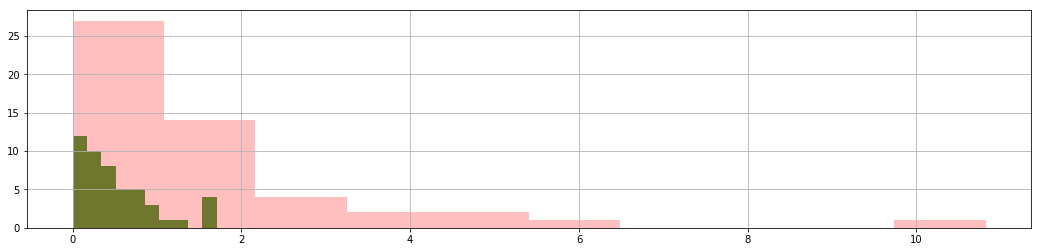

In [172]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

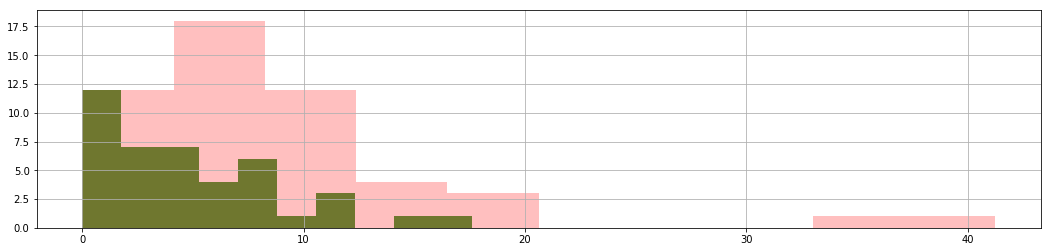

In [173]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))